In [ ]:
pip install 'git+https://github.com/LAL/trackml-library@master#egg=trackml'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/LAL/trackml-library (to revision master) to /tmp/pip-install-uwh20k0_/trackml_7c2681d77dd549cda82a0cb8148af1e9
  Running command git clone -q https://github.com/LAL/trackml-library /tmp/pip-install-uwh20k0_/trackml_7c2681d77dd549cda82a0cb8148af1e9


In [ ]:
import numpy as np
from scipy.stats import uniform, norm

SCATTER_ANGLE = 15 * np.pi / 180
HIT_Y_ERROR = 0.01
N_LAYERS = 7

angle_dist = uniform(-SCATTER_ANGLE, 2*SCATTER_ANGLE)
detector_z = 1.0 + np.arange(N_LAYERS)
dy_dist = norm(scale=HIT_Y_ERROR)

In [ ]:
import pandas as pd
rng = np.random.default_rng()

In [ ]:
def gen_track(angle):
  df = pd.DataFrame({
    'z': detector_z
  })
  df['y'] = np.tan(angle) * df.z + dy_dist.rvs(N_LAYERS, rng)
  df.index.rename('layer', inplace=True)
  return df

gen_track(np.pi / 4)


,z,y
layer,,
0,1.0,1.011657
1,2.0,2.003713
2,3.0,2.983795
3,4.0,3.995129
4,5.0,5.000743
5,6.0,6.000618
6,7.0,6.985954


In [ ]:
def gen_event(n_tracks):
  df = pd.DataFrame({'track_angle': angle_dist.rvs(n_tracks, rng)})
  df['particle_id'] = df.index
  df = df.groupby('particle_id').apply(lambda row: gen_track(row.track_angle.iloc[0]))
  df['weight'] = 1
  df.reset_index(inplace=True)
  df['hit_id'] = df.index
  return df

gen_event(2)

,particle_id,layer,z,y,weight,hit_id
0,0,0,1.0,0.127060,1,0
1,0,1,2.0,0.218752,1,1
2,0,2,3.0,0.338269,1,2
3,0,3,4.0,0.453917,1,3
4,0,4,5.0,0.586706,1,4
5,0,5,6.0,0.694675,1,5
6,0,6,7.0,0.819537,1,6
7,1,0,1.0,0.118586,1,7
8,1,1,2.0,0.240919,1,8
9,1,2,3.0,0.356252,1,9


In [ ]:
def gen_dataset(n_events, n_tracks):
  result = []
  for event_id in range(n_events):
    event = gen_event(n_tracks)
    event['event_id'] = event_id
    result.append(event)
  return pd.concat(result).reset_index(drop=True)

gen_dataset(2, 2)

,particle_id,layer,z,y,weight,hit_id,event_id
0,0,0,1.0,-0.193270,1,0,0
1,0,1,2.0,-0.398435,1,1,0
2,0,2,3.0,-0.623802,1,2,0
3,0,3,4.0,-0.812843,1,3,0
4,0,4,5.0,-1.032019,1,4,0
5,0,5,6.0,-1.240058,1,5,0
6,0,6,7.0,-1.431632,1,6,0
7,1,0,1.0,0.270508,1,7,0
8,1,1,2.0,0.522734,1,8,0
9,1,2,3.0,0.767028,1,9,0


In [ ]:
N_TRACKS = 10

In [ ]:
from trackml.score import score_event
event = gen_event(N_TRACKS)
event

,particle_id,layer,z,y,weight,hit_id
0,0,0,1.0,-0.042307,1,0
1,0,1,2.0,-0.069556,1,1
2,0,2,3.0,-0.118087,1,2
3,0,3,4.0,-0.170968,1,3
4,0,4,5.0,-0.195403,1,4
...,...,...,...,...,...,...
65,9,2,3.0,-0.111009,1,65
66,9,3,4.0,-0.166023,1,66
67,9,4,5.0,-0.227519,1,67
68,9,5,6.0,-0.273309,1,68


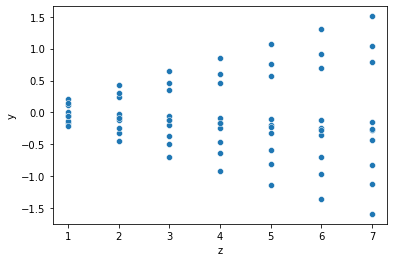

In [ ]:
import seaborn as sns
sns.scatterplot(data=event, x='z', y='y')

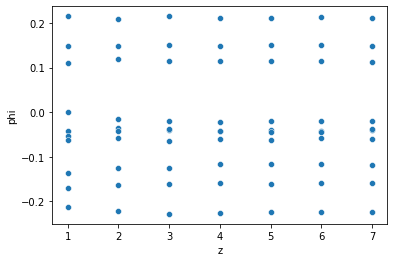

In [ ]:
event['r'] = np.sqrt(event.z**2 + event.y**2)
event['phi'] = np.arctan2(event.y, event.z)
sns.scatterplot(data=event, x='z', y='phi')

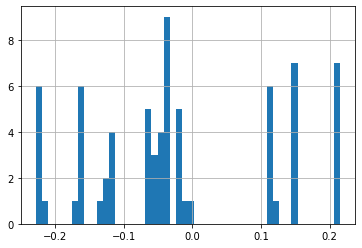

In [ ]:
event.phi.hist(bins=50)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(N_TRACKS)
model.fit(event[['phi']])

KMeans(n_clusters=10)

In [ ]:
event['track_id'] = model.predict(event[['phi']])

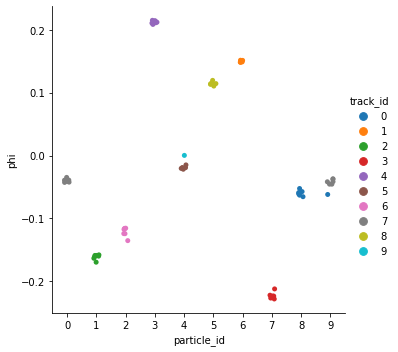

In [ ]:
sns.catplot(data=event, x='particle_id', y='phi', hue='track_id')

In [ ]:
score_event(event, event)

0.8857142857142858